In [144]:
import pandas as pd
df = pd.read_csv('D:\sem 5\dec\shopping_trends.csv')
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")



In [12]:
df = pd.read_csv("D:\sem 5\dec\shopping_trends.csv")
df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (INR),Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
856,857,55,Male,Shirt,Clothing,1749,M,Gold,Summer,3.50,Yes,Debit Card,Express,Yes,Yes,47,Debit Card,Fortnightly
565,566,59,Male,Backpack,Accessories,2279,L,Lavender,Fall,4.20,Yes,UPI,Store Pickup,Yes,Yes,10,UPI,Weekly
1084,1085,34,Male,T-shirt,Clothing,1908,S,Purple,Fall,4.10,No,Credit Card,Next Day Air,Yes,Yes,48,Cash,Quarterly
1704,1705,56,Male,Sneakers,Footwear,1060,M,Lavender,Summer,3.90,No,UPI,Store Pickup,No,No,19,Cash,Every 3 Months
1142,1143,69,Male,T-shirt,Clothing,4028,L,Green,Spring,3.50,No,Cash,Store Pickup,Yes,Yes,27,UPI,Bi-Weekly


In [13]:
df.shape


(3900, 18)

In [94]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (INR)', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases', 'Location'],
      dtype='object')

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (INR)     3900 non-null   int64  
 6   Size                      3900 non-null   object 
 7   Color                     3900 non-null   object 
 8   Season                    3900 non-null   object 
 9   Review Rating             3900 non-null   float64
 10  Subscription Status       3900 non-null   object 
 11  Payment Method            3900 non-null   object 
 12  Shipping Type             3900 non-null   object 
 13  Discount Applied          3900 non-null   object 
 14  Promo Co

In [16]:
df.describe()


,Customer ID,Age,Purchase Amount (INR),Review Rating,Previous Purchases
count,"3,900.00","3,900.00","3,900.00","3,900.00","3,900.00"
mean,"1,950.50",44.07,"3,167.51",3.75,25.35
std,"1,125.98",15.21,"1,255.33",0.72,14.45
min,1.00,18.00,"1,060.00",2.50,1.00
25%,975.75,31.00,"2,067.00",3.10,13.00
50%,"1,950.50",44.00,"3,180.00",3.70,25.00
75%,"2,925.25",57.00,"4,293.00",4.40,38.00
max,"3,900.00",70.00,"5,300.00",5.00,50.00


In [17]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (INR)       0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [18]:
df.duplicated().sum()


0

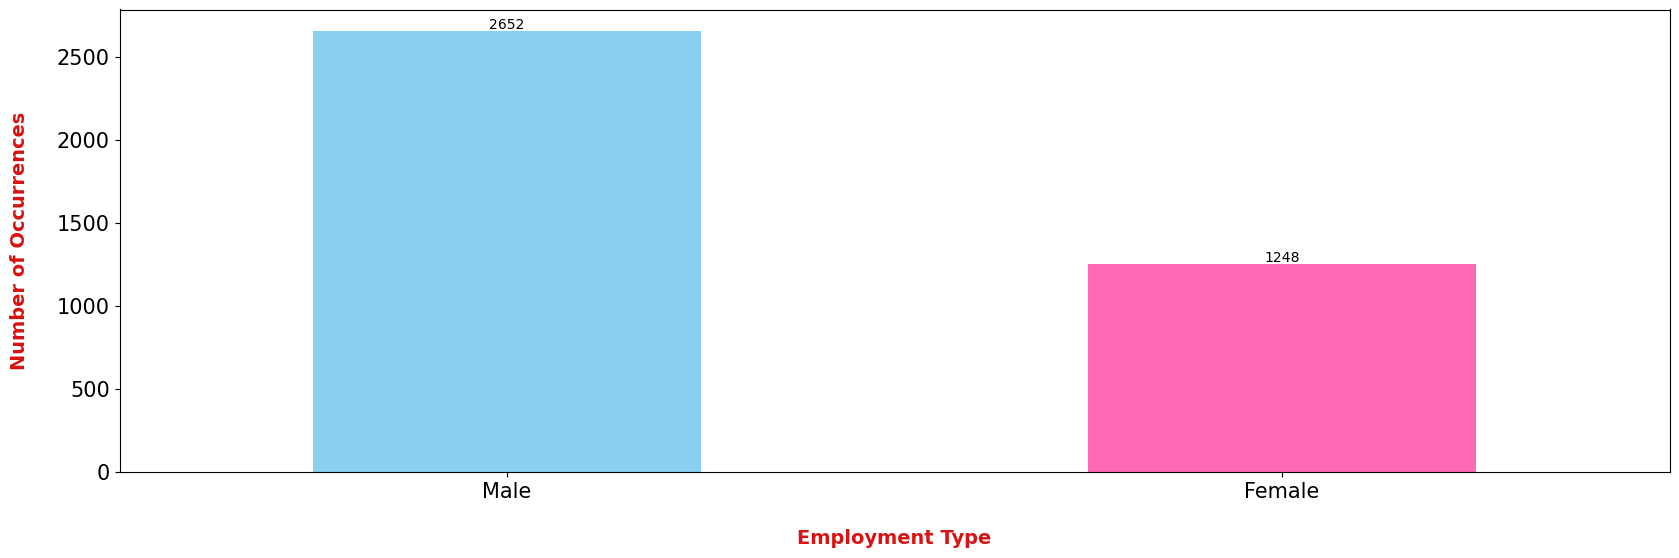

In [145]:
plt.figure(figsize = (20, 6))
ax = df["Gender"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Male', 'Female'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

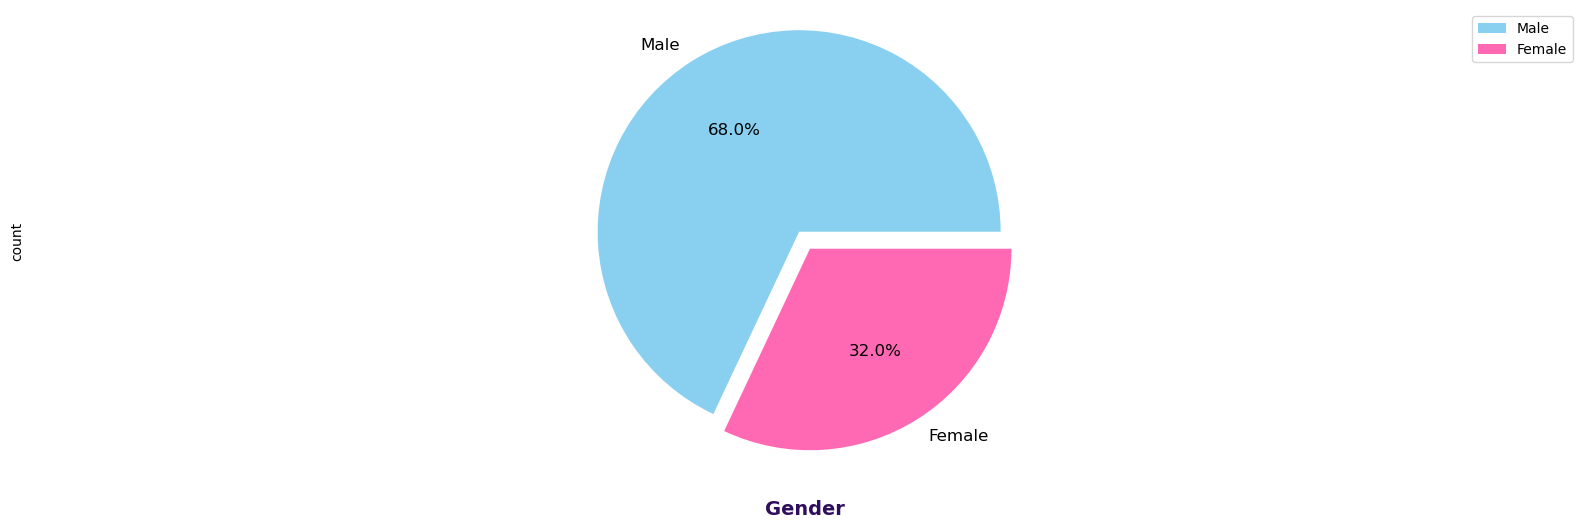

In [146]:
plt.figure(figsize = (20, 6))

counts = df["Gender"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()


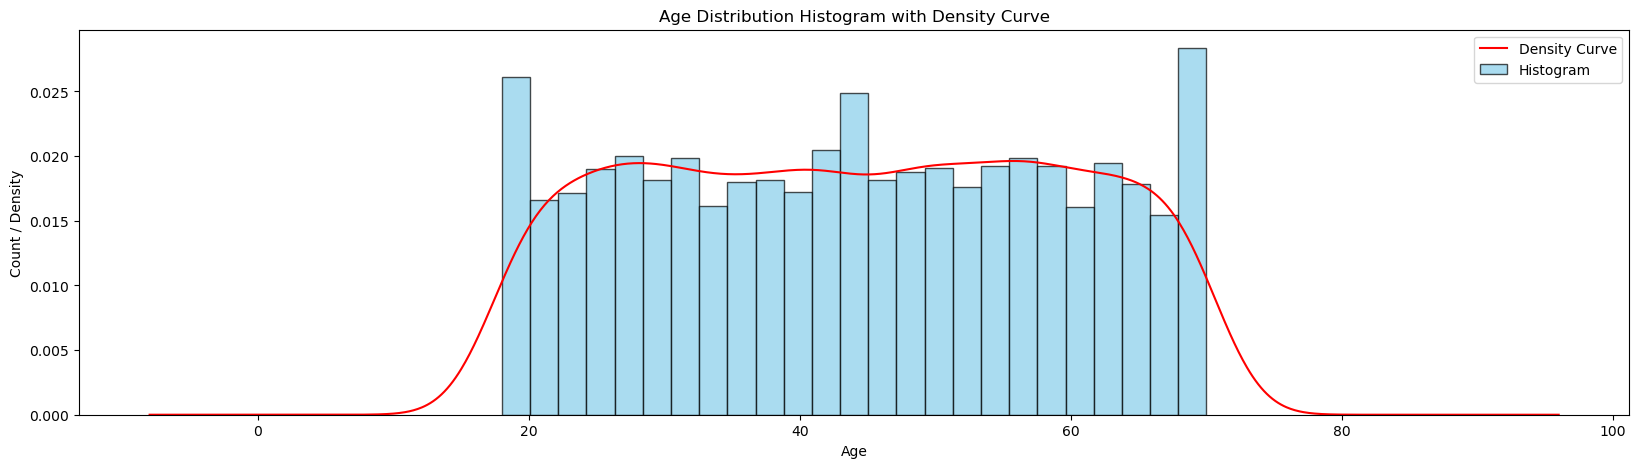

In [147]:
fig, ax = plt.subplots(figsize = (20, 5))

ax.hist(df['Age'], bins = 25, edgecolor = 'black', alpha = 0.7, color = 'skyblue', density = True)
df['Age'].plot(kind = 'kde', color = 'red', ax = ax)

ax.set_xlabel('Age')
ax.set_ylabel('Count / Density')
ax.set_title('Age Distribution Histogram with Density Curve')
ax.legend(['Density Curve', 'Histogram'])
plt.show()

In [22]:
df["Category"].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

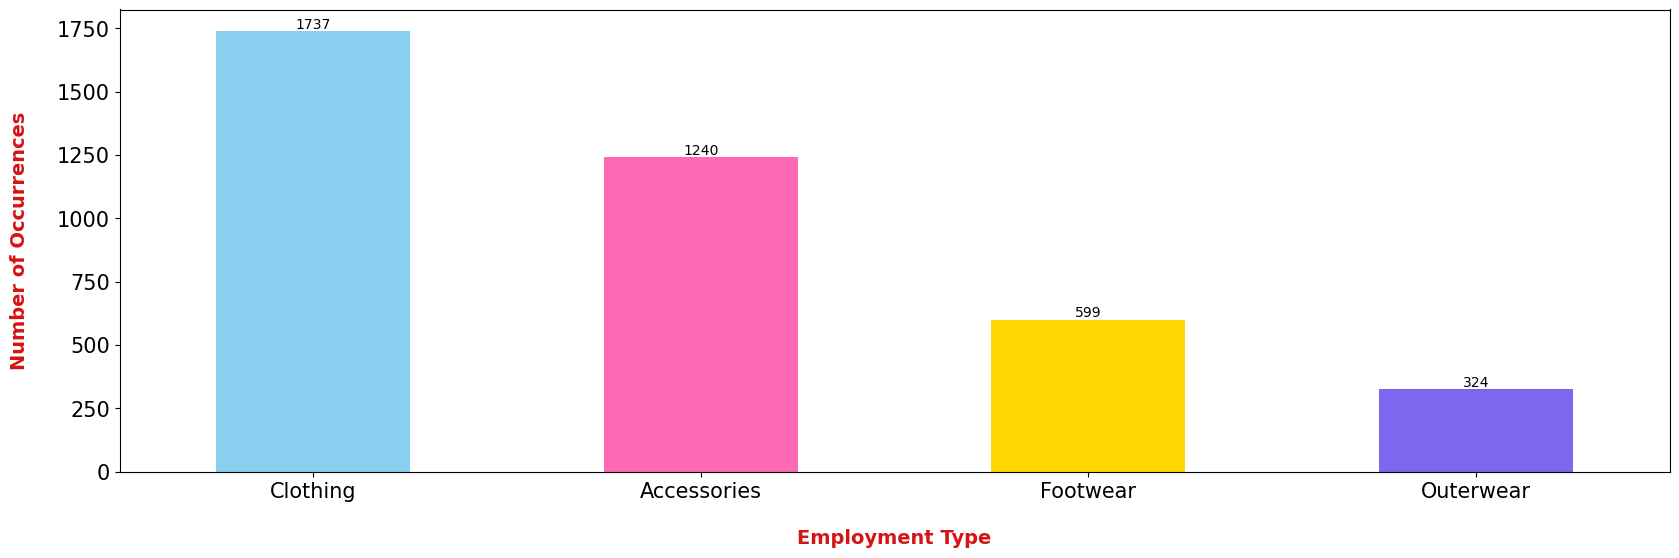

In [23]:
plt.figure(figsize = (20, 6))
ax = df["Category"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Clothing', 'Accessories', 'Footwear', 'Outerwear'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

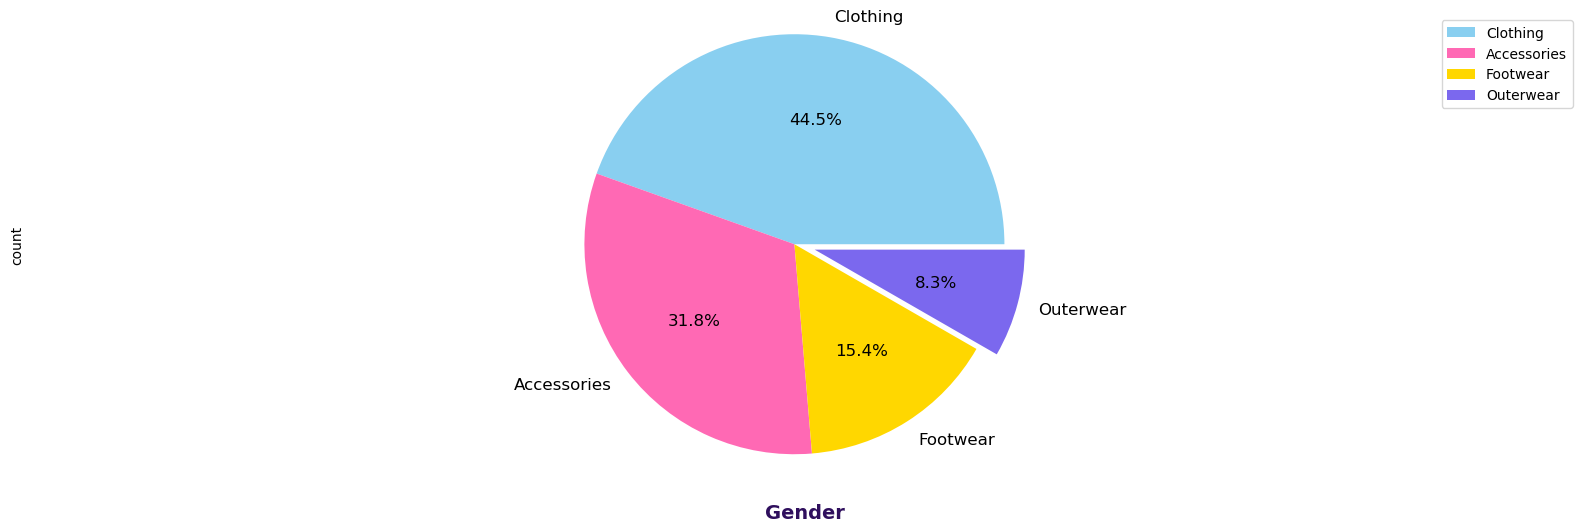

In [25]:
plt.figure(figsize = (20, 6))

counts = df["Category"].value_counts()
explode = (0, 0.0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [26]:
df["Item Purchased"].value_counts()

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

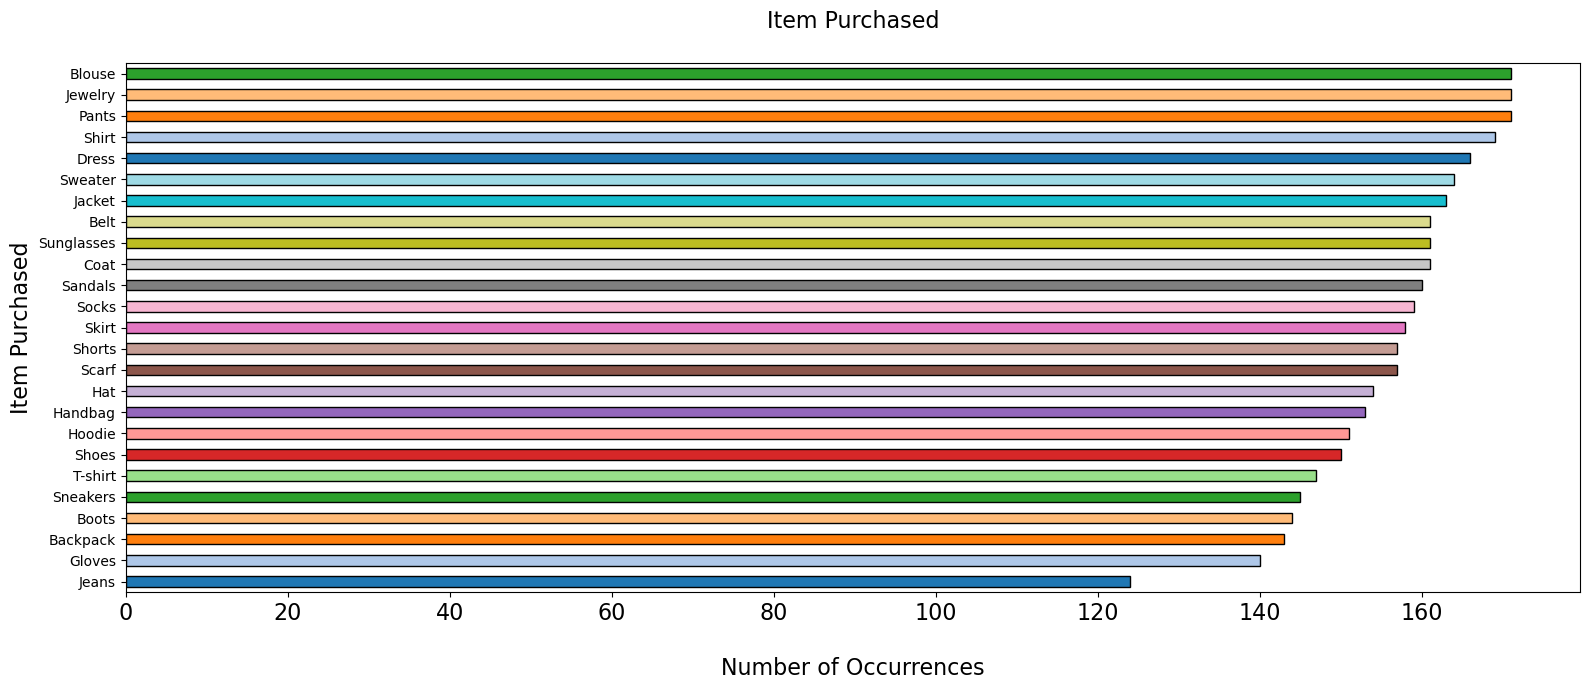

In [148]:
plt.figure(figsize = (16, 7))
df["Item Purchased"].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.ylabel('Item Purchased', fontsize = 16)
plt.xlabel('\nNumber of Occurrences', fontsize = 16)
plt.title('Item Purchased\n', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

In [30]:
df["Preferred Payment Method"].value_counts()

Preferred Payment Method
UPI            1923
Credit Card     671
Cash            670
Debit Card      636
Name: count, dtype: int64

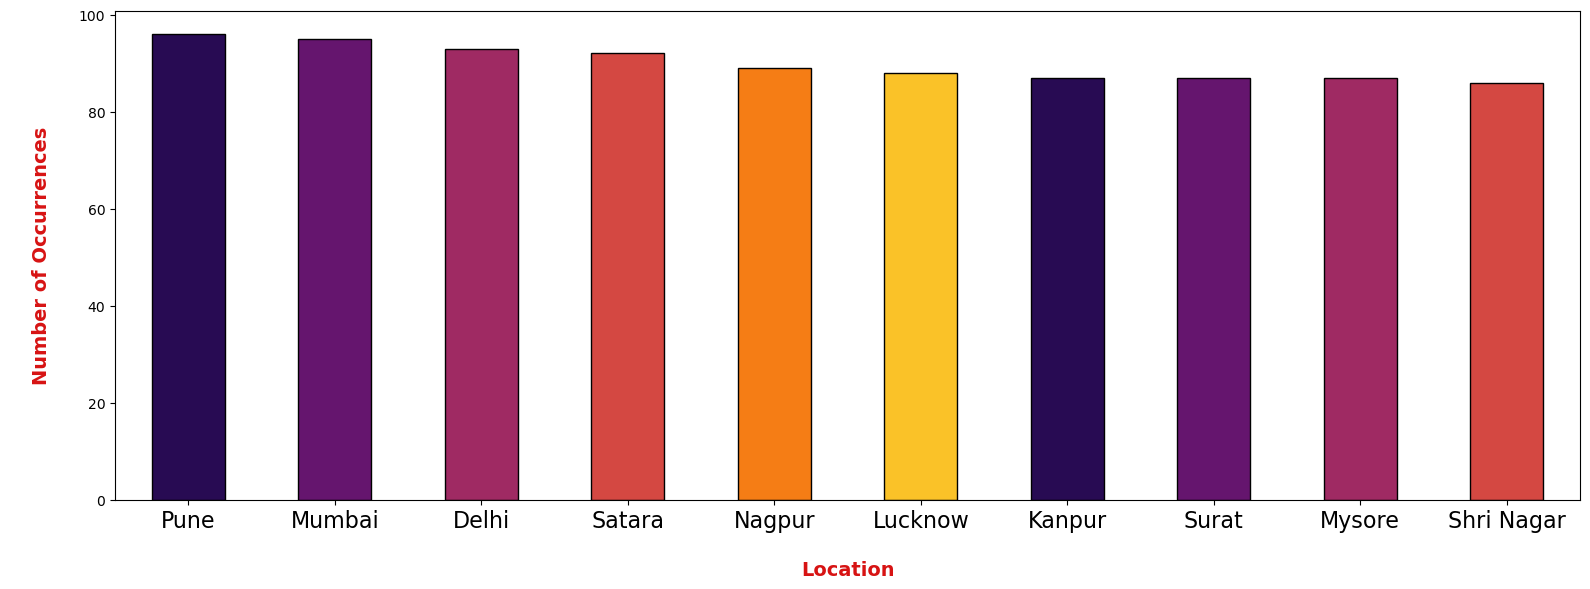

In [120]:
plt.figure(figsize = (16, 6))
df["Location"].value_counts()[:10].sort_values(ascending = False).plot(kind = 'bar', color = sns.color_palette('inferno'), edgecolor = 'black')
plt.xlabel('Location', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

In [34]:
df["Size"].value_counts()

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

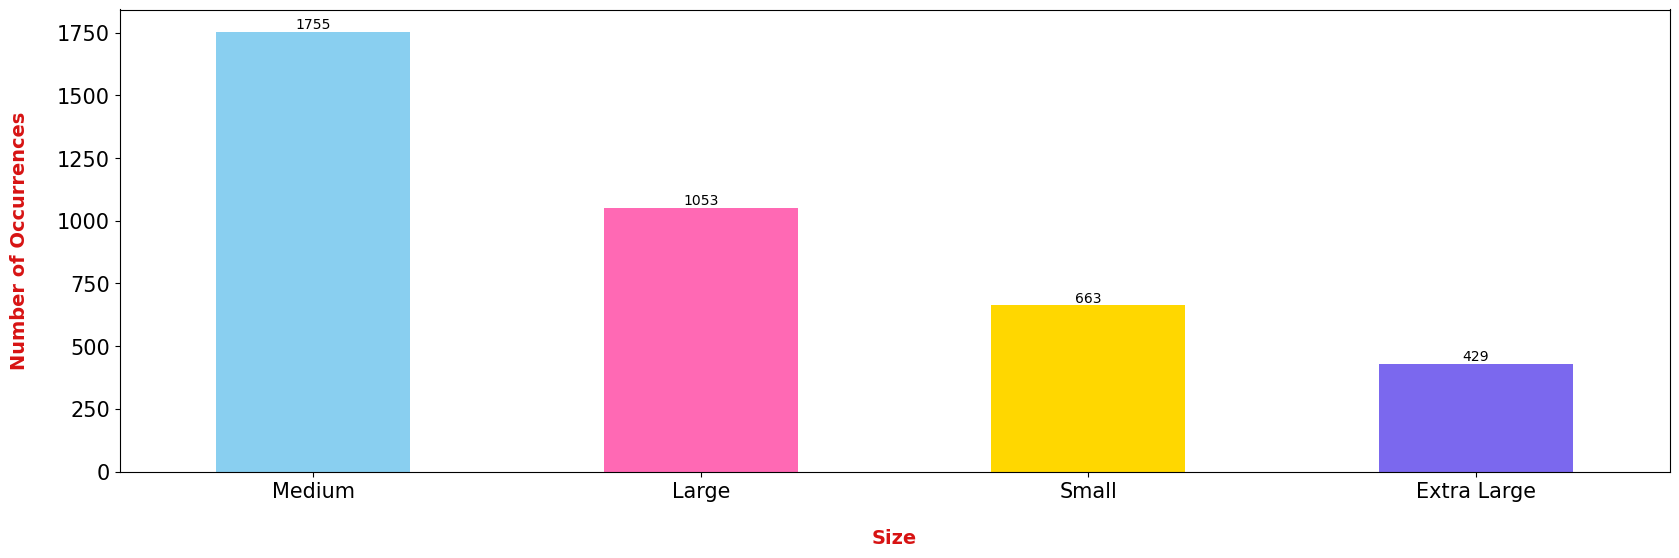

In [35]:
plt.figure(figsize = (20, 6))
ax = df["Size"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Medium', 'Large', 'Small', 'Extra Large'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Size', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

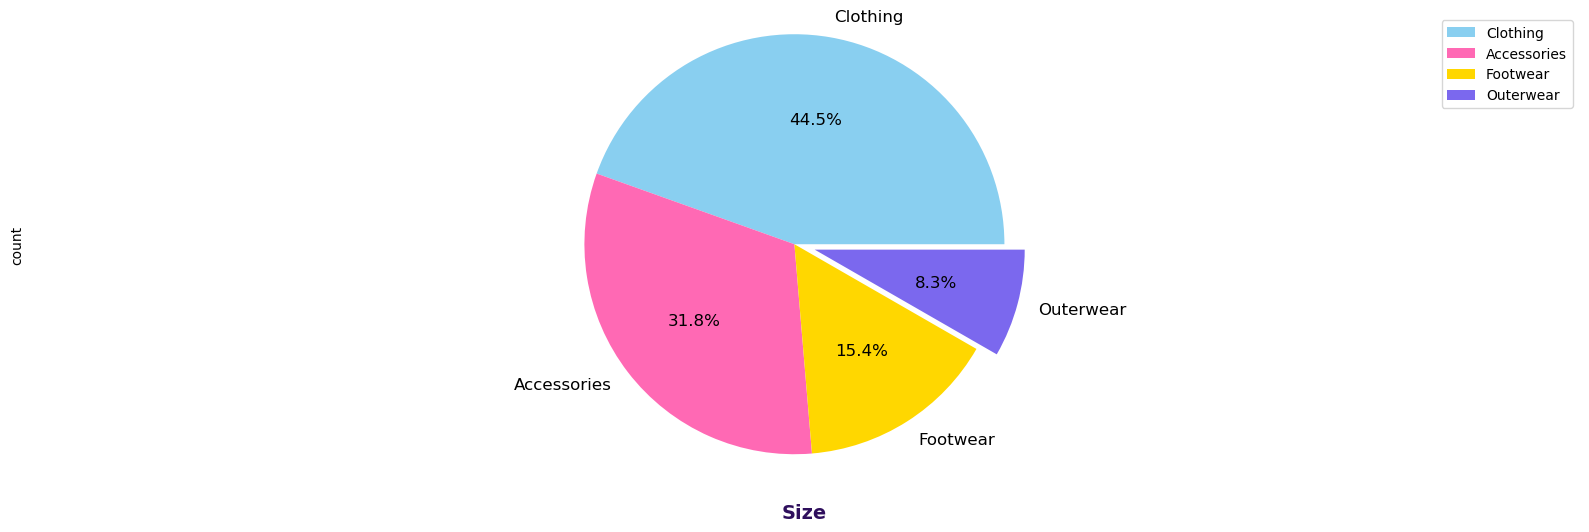

In [36]:
plt.figure(figsize = (20, 6))

counts = df["Category"].value_counts()
explode = (0, 0.0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [37]:
df["Color"].value_counts()

Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64

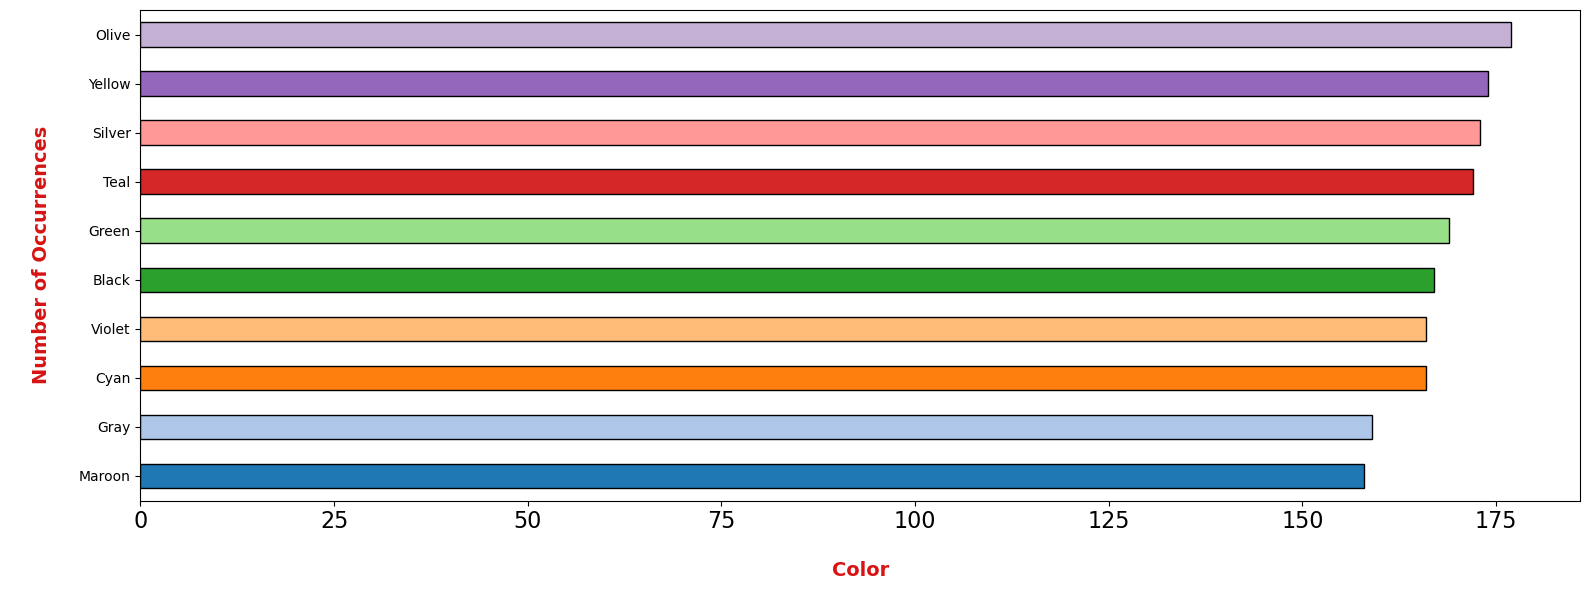

In [38]:
plt.figure(figsize = (16, 6))
df["Color"].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.xlabel('Color', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

In [39]:
df["Season"].value_counts()

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

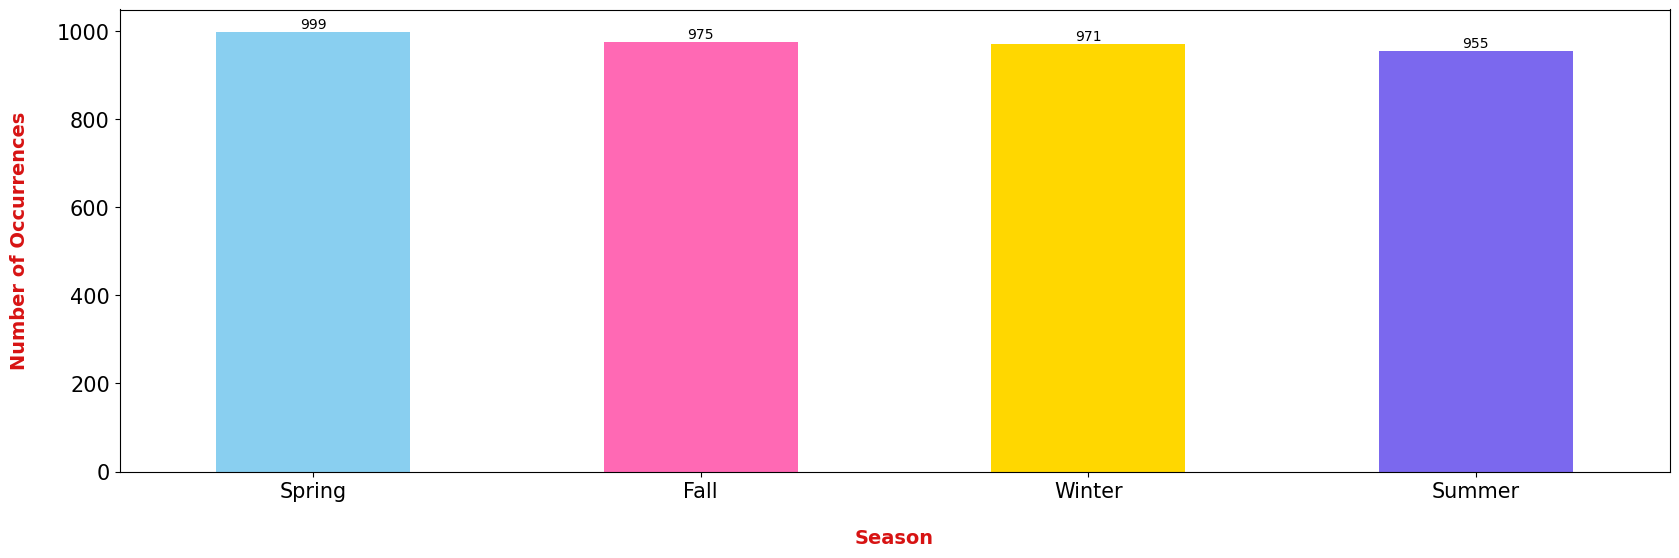

In [40]:
plt.figure(figsize = (20, 6))
ax = df["Season"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Spring', 'Fall', 'Winter', 'Summer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Season', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

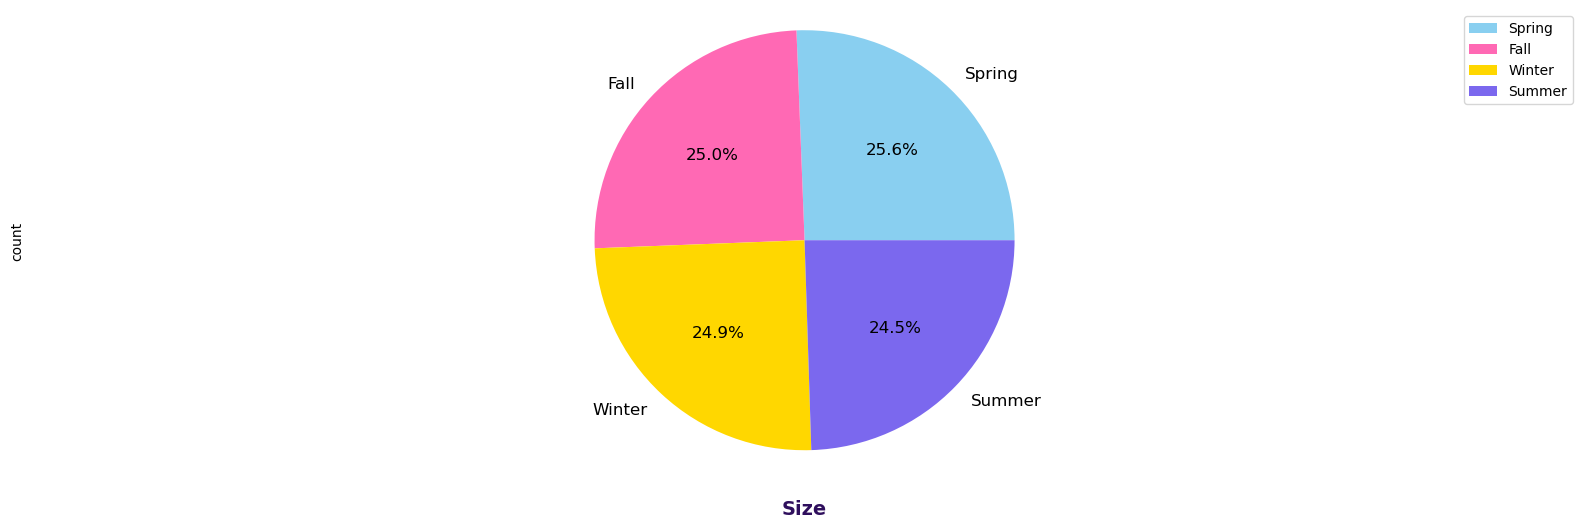

In [41]:
plt.figure(figsize = (20, 6))

counts = df["Season"].value_counts()
explode = (0, 0, 0, 0)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [42]:
df["Subscription Status"].value_counts()

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

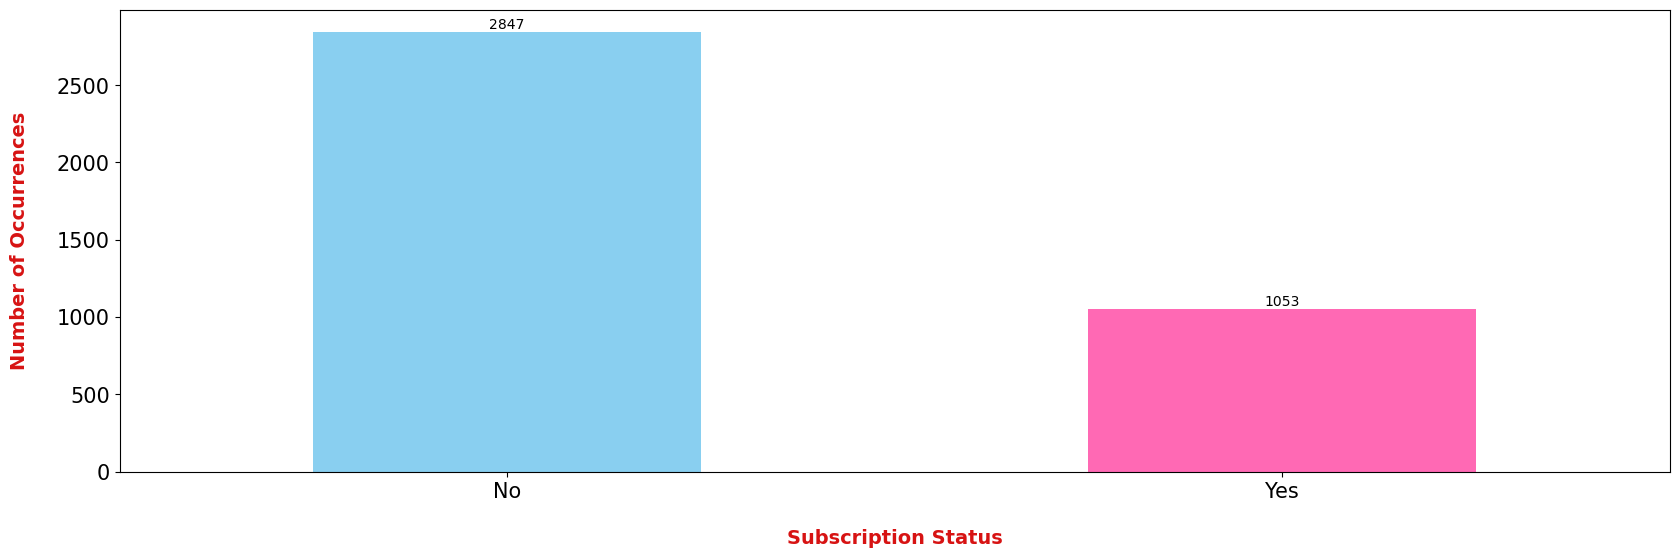

In [43]:
plt.figure(figsize = (20, 6))
ax = df["Subscription Status"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('No', 'Yes'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Subscription Status', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

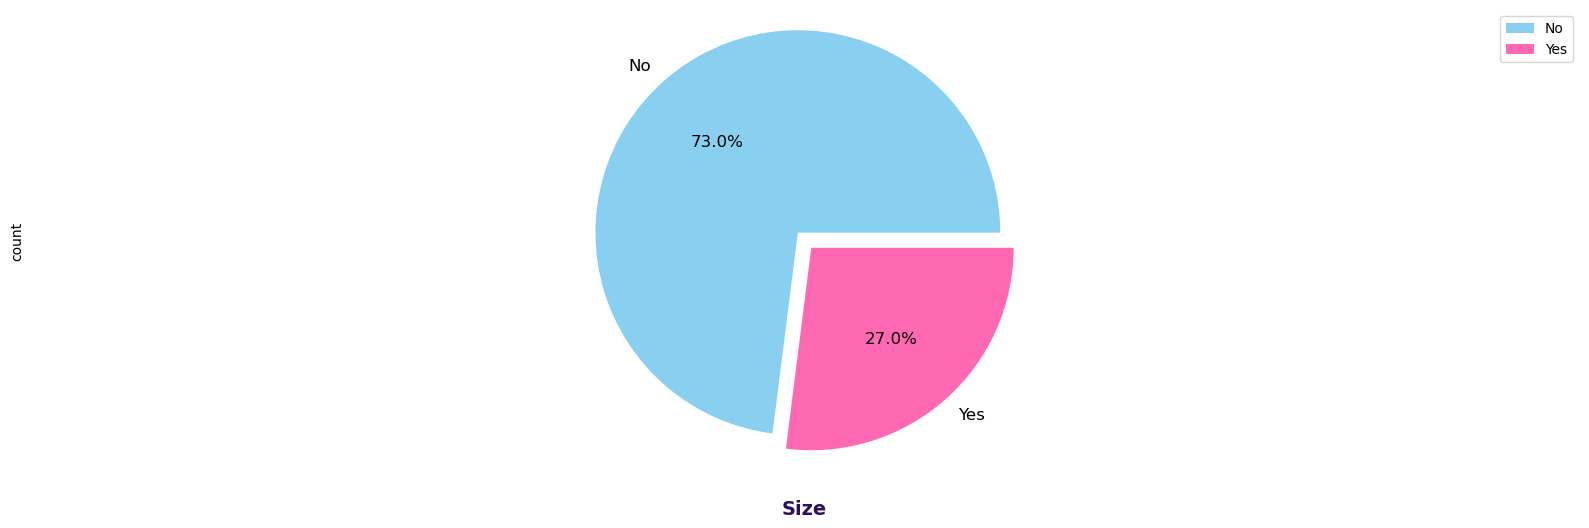

In [44]:
plt.figure(figsize = (20, 6))

counts = df["Subscription Status"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [45]:
df["Payment Method"].value_counts()

Payment Method
UPI            1923
Credit Card     696
Cash            648
Debit Card      633
Name: count, dtype: int64

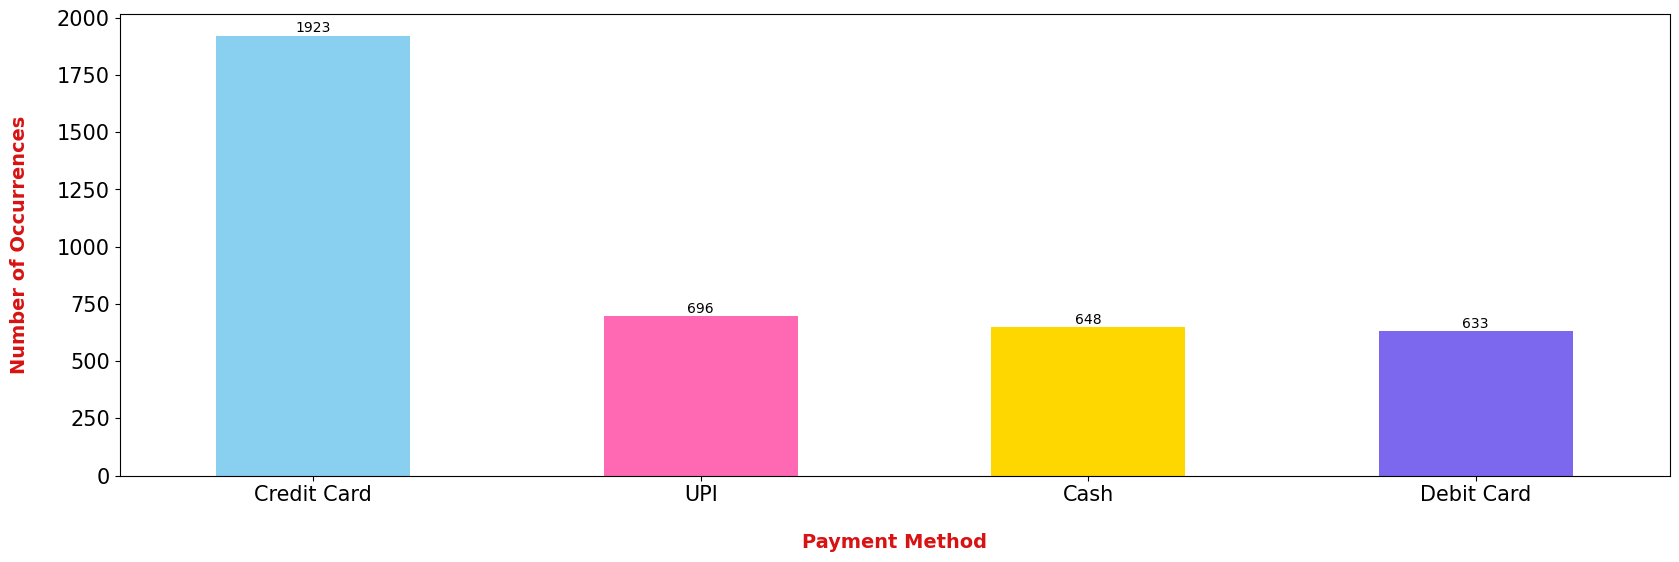

In [47]:
plt.figure(figsize = (20, 6))
ax = df["Payment Method"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Credit Card', 'UPI', 'Cash', 'Debit Card'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Payment Method', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

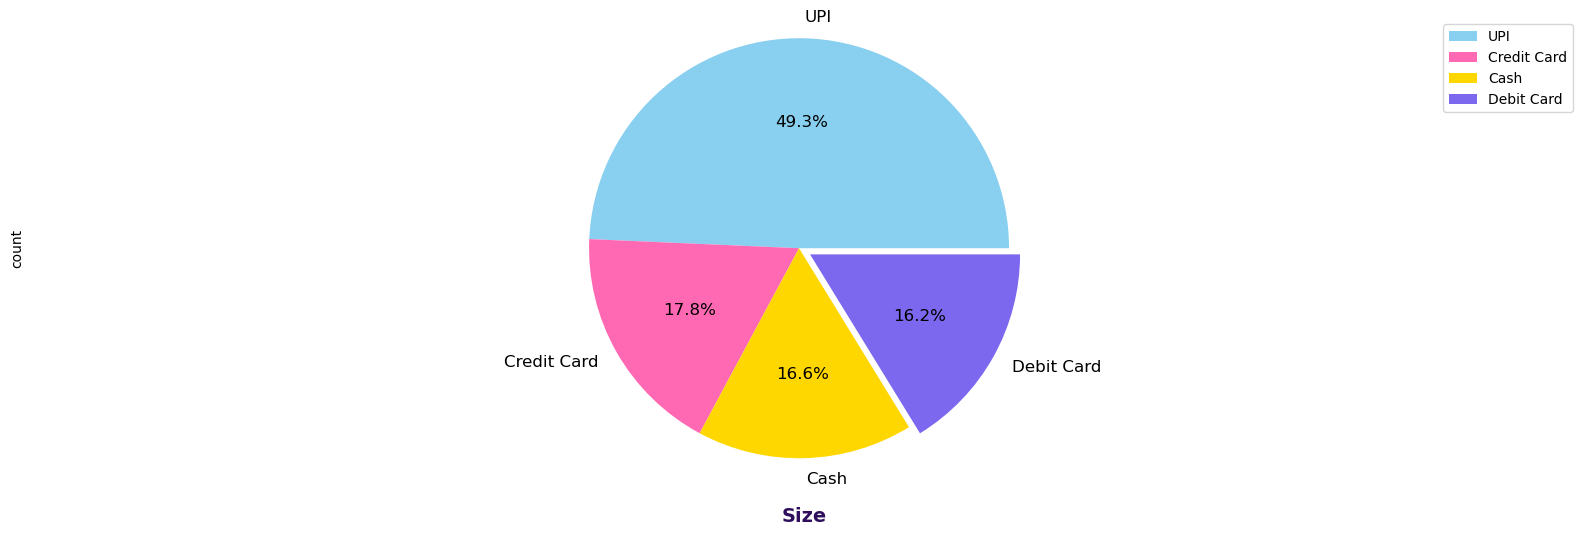

In [49]:
plt.figure(figsize = (20, 6))

counts = df["Payment Method"].value_counts()
explode = (0, 0, 0.0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [50]:

df["Shipping Type"].value_counts()

Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64

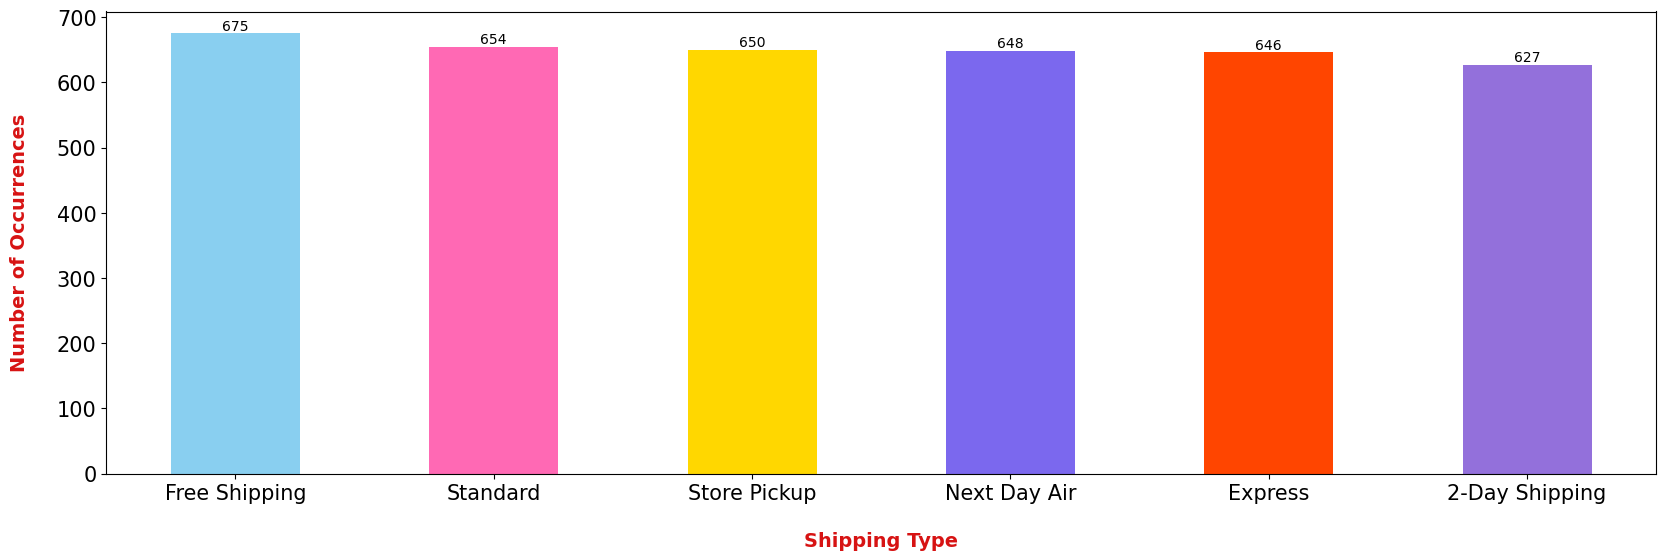

In [51]:
plt.figure(figsize = (20, 6))
ax = df["Shipping Type"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Free Shipping', 'Standard', 'Store Pickup', 'Next Day Air', 'Express', '2-Day Shipping'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Shipping Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

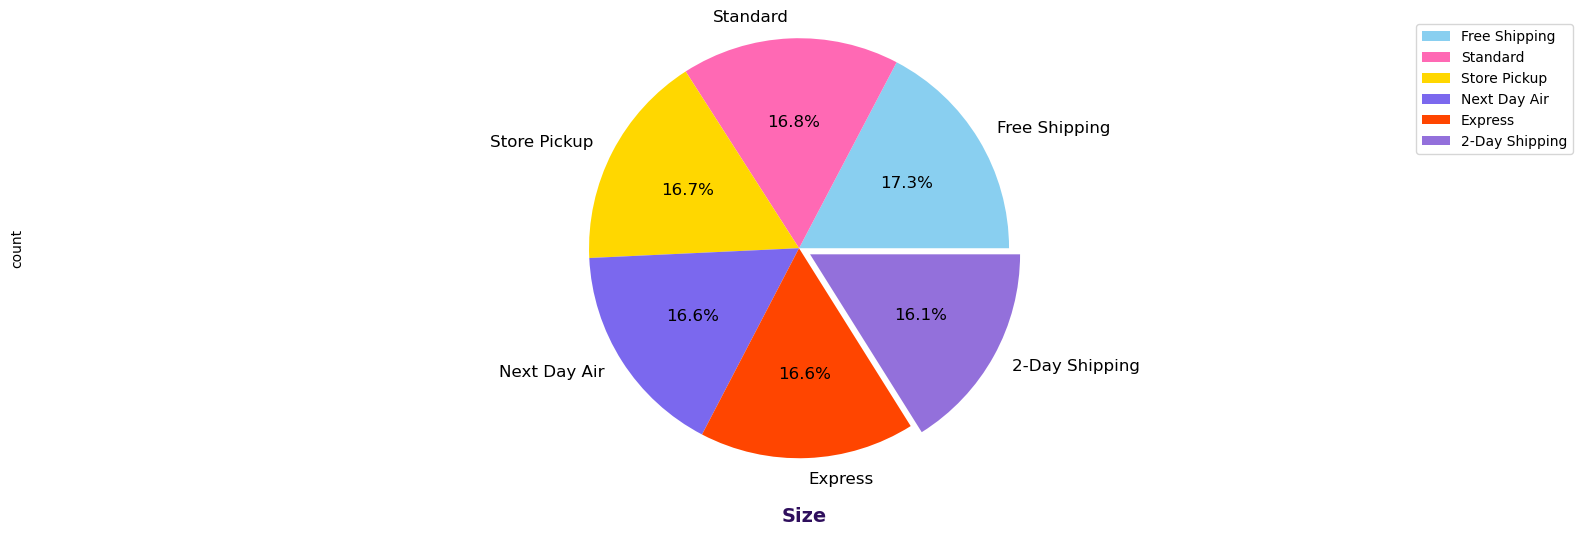

In [52]:
plt.figure(figsize = (20, 6))

counts = df["Shipping Type"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [53]:
df["Payment Method"].value_counts()

Payment Method
UPI            1923
Credit Card     696
Cash            648
Debit Card      633
Name: count, dtype: int64

In [54]:
df["Frequency of Purchases"].value_counts()

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

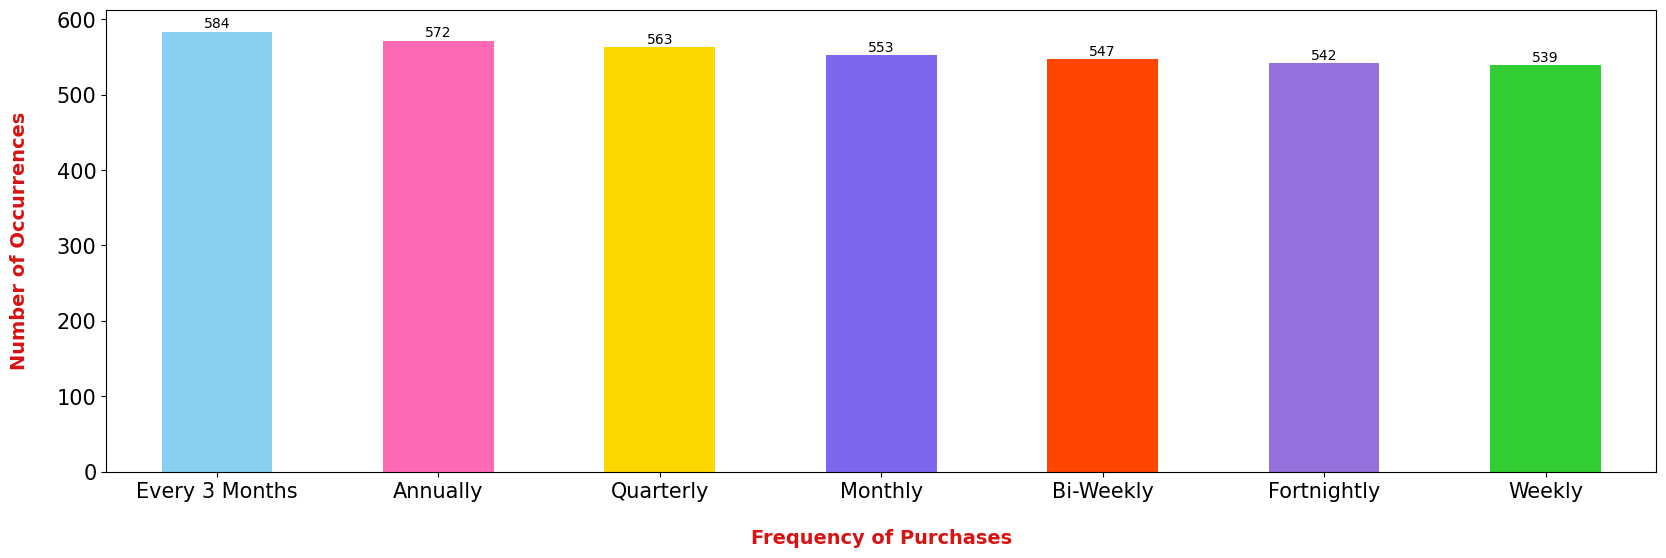

In [55]:
plt.figure(figsize = (20, 6))
ax = df["Frequency of Purchases"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Every 3 Months', 'Annually', 'Quarterly', 'Monthly', 'Bi-Weekly', 'Fortnightly', 'Weekly'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Frequency of Purchases', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

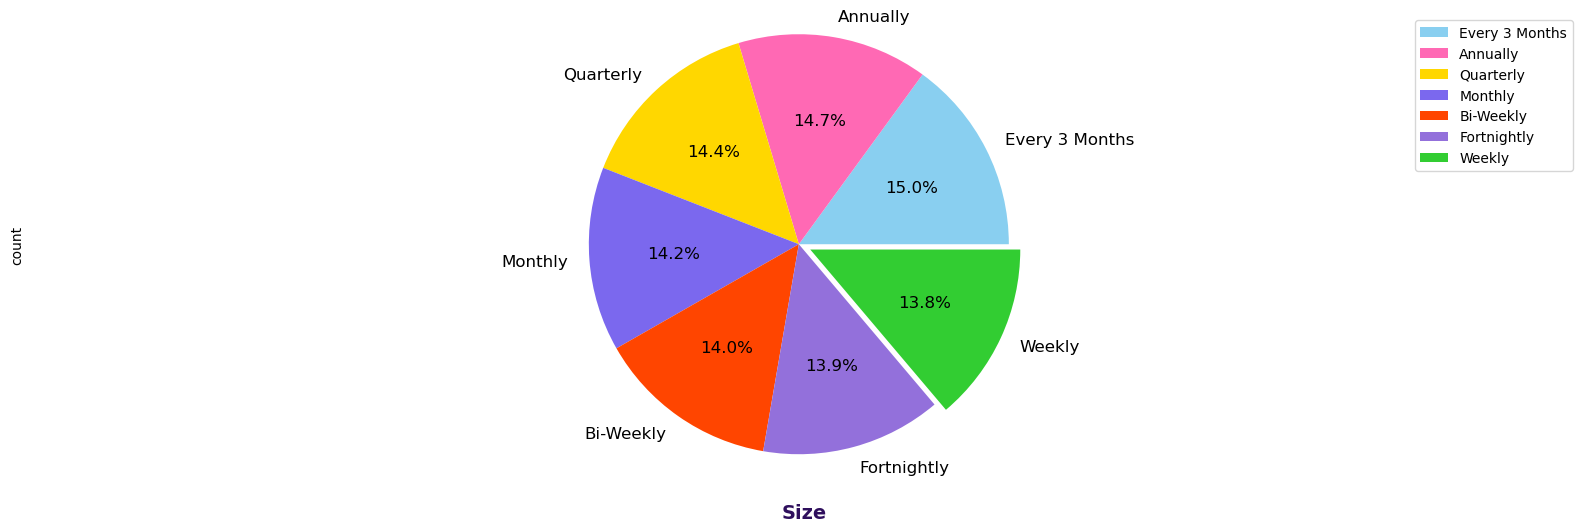

In [56]:
plt.figure(figsize = (20, 6))

counts = df["Frequency of Purchases"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [57]:
average_age = df['Age'].mean()
print("Average Age:", average_age)

Average Age: 44.06846153846154


In [58]:
most_common_item = df['Item Purchased'].mode()[0]
print("Most Common Item Purchased:", most_common_item)

Most Common Item Purchased: Blouse


In [62]:
total_purchase_by_category = df.groupby('Category')['Purchase Amount (INR)'].sum()
print("Total Purchase Amount by Category:")
print(total_purchase_by_category)

Total Purchase Amount by Category:
Category
Accessories    3932600
Clothing       5525992
Footwear       1912929
Outerwear       981772
Name: Purchase Amount (INR), dtype: int64


In [63]:
average_rating_male = df[df['Gender'] == 'Male']['Review Rating'].mean()
average_rating_female = df[df['Gender'] == 'Female']['Review Rating'].mean()
print("Average Review Rating for Male Customers:", average_rating_male)
print("Average Review Rating for Female Customers:", average_rating_female)

Average Review Rating for Male Customers: 3.7539592760180995
Average Review Rating for Female Customers: 3.741426282051282


In [64]:
most_common_payment_method = df['Payment Method'].mode()[0]
print("Most Common Payment Method:", most_common_payment_method)

Most Common Payment Method: UPI


In [65]:
median_purchase_amount = df['Purchase Amount (INR)'].median()
print("Median Purchase Amount (INR):", median_purchase_amount)

Median Purchase Amount (INR): 3180.0


In [66]:
subscription_count = df[df['Subscription Status'] == 'Yes']['Customer ID'].count()
print("Number of Customers with Subscription: ", subscription_count)

Number of Customers with Subscription:  1053


In [68]:
avg_purchase_subscription_yes = df[df['Subscription Status'] == 'Yes']['Purchase Amount (INR)'].mean()
avg_purchase_subscription_no = df[df['Subscription Status'] == 'No']['Purchase Amount (INR)'].mean()
print("Average Purchase Amount for Subscription 'Yes':", avg_purchase_subscription_yes)
print("Average Purchase Amount for Subscription 'No':", avg_purchase_subscription_no)

Average Purchase Amount for Subscription 'Yes': 3153.0721747388416
Average Purchase Amount for Subscription 'No': 3172.8514225500526


In [69]:
most_common_season = df['Season'].mode()[0]
print("Most Common Season for Purchases:", most_common_season)

Most Common Season for Purchases: Spring


In [71]:
total_purchase_by_gender = df.groupby('Gender')['Purchase Amount (INR)'].sum()
print("Total Purchase Amount by Gender:")
print(total_purchase_by_gender)

Total Purchase Amount by Gender:
Gender
Female    3985123
Male      8368170
Name: Purchase Amount (INR), dtype: int64


In [72]:
average_age_summer = df[df['Season'] == 'Summer']['Age'].mean()
print("Average Age of Customers in the Summer Season:", average_age_summer)

Average Age of Customers in the Summer Season: 43.973821989528794


In [73]:
promo_code_count = df[df['Promo Code Used'] == 'Yes']['Customer ID'].count()
print("Number of Customers who used Promo Code:", promo_code_count)

Number of Customers who used Promo Code: 1677


In [74]:
max_review_rating = df['Review Rating'].max()
min_review_rating = df['Review Rating'].min()
print("Maximum Review Rating:", max_review_rating)
print("Minimum Review Rating:", min_review_rating)

Maximum Review Rating: 5.0
Minimum Review Rating: 2.5


In [75]:
common_shipping_high_rating = df[df['Review Rating'] > 4]['Shipping Type'].mode()[0]
print("Most Common Shipping Type for High Review Ratings:", common_shipping_high_rating)

Most Common Shipping Type for High Review Ratings: Standard


In [76]:
customers_above_30_previous_purchases = df[df['Previous Purchases'] > 30]['Customer ID'].count()
print("Number of Customers with more than 30 Previous Purchases:", customers_above_30_previous_purchases)

Number of Customers with more than 30 Previous Purchases: 1549


In [78]:
avg_purchase_above_30_previous_purchases = df[df['Previous Purchases'] > 30]['Purchase Amount (INR)'].mean()
print("Average Purchase Amount for Customers with more than 30 Previous Purchases:", avg_purchase_above_30_previous_purchases)

Average Purchase Amount for Customers with more than 30 Previous Purchases: 3181.505487411233


In [80]:
total_purchase_free_shipping = df[df['Shipping Type'] == 'Free Shipping']['Purchase Amount (INR)'].sum()
print("Total Purchase Amount for 'Free Shipping' Shipping Type:", total_purchase_free_shipping)

Total Purchase Amount for 'Free Shipping' Shipping Type: 2161181


In [82]:
total_purchase_free_shipping = df[df['Shipping Type'] == 'Free Shipping']['Purchase Amount (INR)'].sum()
print("Total Purchase Amount for 'Free Shipping' Shipping Type:", total_purchase_free_shipping)

Total Purchase Amount for 'Free Shipping' Shipping Type: 2161181


In [84]:
avg_purchase_with_discount = df[df['Discount Applied'] == 'Yes']['Purchase Amount (INR)'].mean()
print("Average Purchase Amount for Customers with Discount Applied:", avg_purchase_with_discount)

Average Purchase Amount for Customers with Discount Applied: 3141.7906976744184


In [85]:
common_category_low_rating_female = df[(df['Gender'] == 'Female') & (df['Review Rating'] < 3)]['Category'].mode()[0]
print("Most Common Category for Low Review Rating Female Customers:", common_category_low_rating_female)

Most Common Category for Low Review Rating Female Customers: Clothing


In [86]:
average_age_high_rating_promo = df[(df['Review Rating'] > 4) & (df['Promo Code Used'] == 'Yes')]['Age'].mean()
print("Average Age of Customers with High Review Ratings and Promo Code Used:", average_age_high_rating_promo)

Average Age of Customers with High Review Ratings and Promo Code Used: 43.9872


In [122]:
total_purchase_by_location = df.groupby('Location')['Purchase Amount (INR)'].sum()
print("Total Purchase Amount by Location:")
print(total_purchase_by_location)

Total Purchase Amount by Location:
Location
Agra            222,653.00
Ahemdabad       233,306.00
Akola           255,884.00
Aurangabad      256,944.00
Banglore        232,564.00
Bhopal          257,951.00
Calcutta        232,352.00
Chennai         453,256.00
Coimbatore      223,766.00
Delhi           501,274.00
Faridabad       201,294.00
Gorakhpur       265,742.00
Gurgaon         249,736.00
Himayatnagar    198,856.00
Humpi           252,174.00
Hyderabad       246,397.00
Indore          229,278.00
Itarsi          246,715.00
Jaipur          256,626.00
Jalna           252,916.00
Jammu           248,623.00
Jamnagar        274,222.00
Jodhpur         261,078.00
Kanpur          274,116.00
Lucknow         263,781.00
Manipur         258,799.00
Mumbai          297,065.00
Mysore          292,242.00
Nagpur          278,833.00
Nashik          251,326.00
New Delhi       223,607.00
Panji           276,660.00
Patna           235,479.00
Pryagraj        235,267.00
Pune            306,552.00
Pushkar    

In [100]:
avg_purchase_subscription_UPI = df[(df['Subscription Status'] == 'Yes') & (df['Payment Method'] == 'UPI')]['Purchase Amount (INR)'].mean()
print("Average Purchase Amount for Customers with Subscription and UPI Payment Method:", avg_purchase_subscription_UPI)

Average Purchase Amount for Customers with Subscription and UPI Payment Method: 3193.25


In [101]:
purchase_frequency_distribution = df['Frequency of Purchases'].value_counts()
print("Frequency Distribution of Purchase Frequency:")
print(purchase_frequency_distribution)

Frequency Distribution of Purchase Frequency:
Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64


In [103]:
avg_purchase_by_color = df.groupby('Color')['Purchase Amount (INR)'].mean()
print("Average Purchase Amount by Color:")
print(avg_purchase_by_color)

Average Purchase Amount by Color:
Color
Beige       3,201.99
Black       3,095.26
Blue        3,018.56
Brown       3,130.38
Charcoal    3,213.60
Cyan        3,280.25
Gold        3,233.38
Gray        3,312.00
Green       3,482.32
Indigo      2,981.34
Lavender    3,133.85
Magenta     3,027.97
Maroon      3,154.84
Olive       3,081.79
Orange      3,227.15
Peach       3,136.96
Pink        3,211.18
Purple      3,180.70
Red         3,143.83
Silver      3,012.12
Teal        3,222.83
Turquoise   2,947.53
Violet      3,270.99
White       3,319.96
Yellow      3,139.79
Name: Purchase Amount (INR), dtype: float64


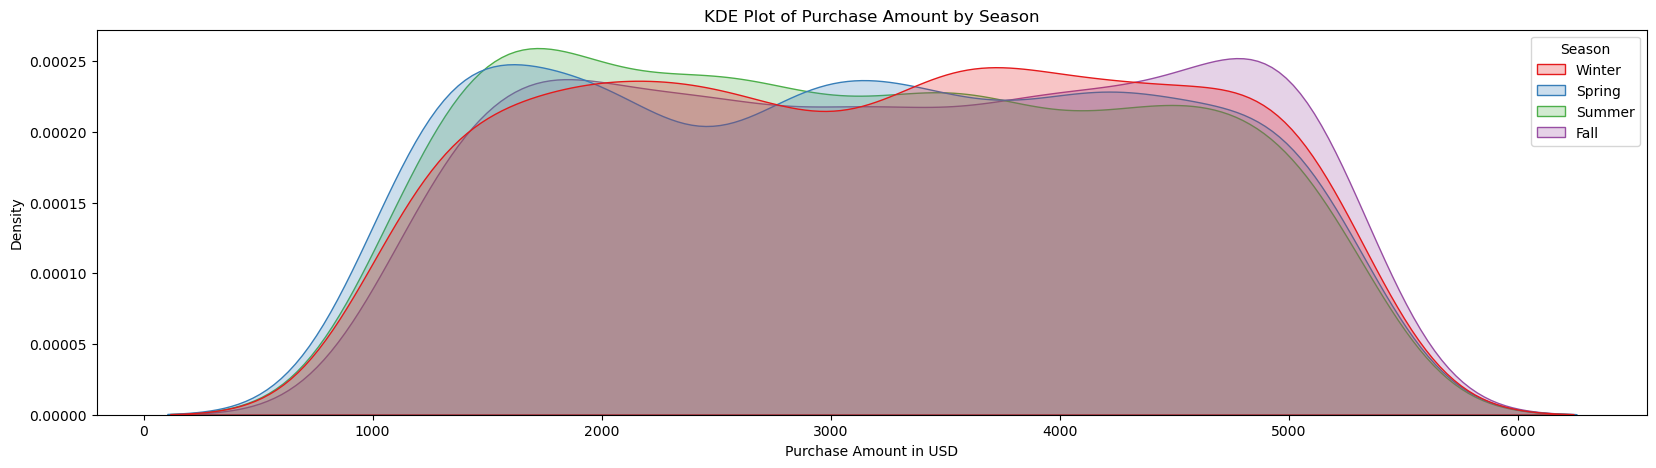

In [106]:
plt.figure(figsize=(20, 5))
sns.kdeplot(data = df, x = 'Purchase Amount (INR)', hue = 'Season', common_norm = False, fill = True, palette = 'Set1')
plt.title('KDE Plot of Purchase Amount by Season')
plt.xlabel('Purchase Amount in USD')
plt.show()

In [108]:
common_payment_fall = df[df['Season'] == 'Fall']['Payment Method'].mode()[0]
print("Most Common Payment Method for Fall Season Purchases:", common_payment_fall)

Most Common Payment Method for Fall Season Purchases: UPI


In [109]:
purchase_count_by_category = df['Category'].value_counts()
print("Purchase Count by Category:")
print(purchase_count_by_category)

Purchase Count by Category:
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


In [110]:
avg_age_accessories_discount = df[(df['Category'] == 'Accessories') & (df['Discount Applied'] == 'Yes')]['Age'].mean()
print("Average Age of Customers who purchased Accessories with Discount Applied:", avg_age_accessories_discount)

Average Age of Customers who purchased Accessories with Discount Applied: 44.23941068139963


In [112]:
total_purchase_by_size = df[df['Category'] == 'Clothing'].groupby('Size')['Purchase Amount (INR)'].sum()
print("Total Purchase Amount by Size for Clothing Items:")
print(total_purchase_by_size)

Total Purchase Amount by Size for Clothing Items:
Size
L     1476792
M     2493173
S      923048
XL     632979
Name: Purchase Amount (INR), dtype: int64


In [114]:
total_purchase_above_40_previous = df[df['Previous Purchases'] > 40]['Purchase Amount (INR)'].sum()
print("Total Purchase Amount for Customers with more than 40 Previous Purchases:", total_purchase_above_40_previous)

Total Purchase Amount for Customers with more than 40 Previous Purchases: 2469270


In [115]:
common_location_socks_discount = df[(df['Item Purchased'] == 'Socks') & (df['Discount Applied'] == 'Yes')]['Location'].mode()[0]
print("Most Common Location for Socks Purchases with Discount Applied:", common_location_socks_discount)

Most Common Location for Socks Purchases with Discount Applied: Georgia


In [119]:
avg_purchase_subscription_CreditCard_no_promo = df[(df['Subscription Status'] == 'Yes') & (df['Payment Method'] == 'Credit Card') & (df['Promo Code Used'] == 'No')]['Purchase Amount (INR)'].mean()
print("Average Purchase Amount for Customers with Subscription, Credit Card Payment, and No Promo Code:", avg_purchase_subscription_CreditCard_no_promo)

Average Purchase Amount for Customers with Subscription, Credit Card Payment, and No Promo Code: nan


In [124]:
common_item_high_rating_louisiana = df[(df['Location'] == 'Pune') & (df['Review Rating'] >= 4)]['Item Purchased'].mode()[0]
print("Most Common Item Purchased by High-Rating Customers in Pune:", common_item_high_rating_louisiana)

Most Common Item Purchased by High-Rating Customers in Pune: Backpack


In [126]:
total_purchase_fall_credit_card = df[(df['Season'] == 'Fall') & (df['Payment Method'] == 'Credit Card')]['Purchase Amount (INR)'].sum()
print("Total Purchase Amount for Fall Season Purchases with Credit Card Payment Method:", total_purchase_fall_credit_card)

Total Purchase Amount for Fall Season Purchases with Credit Card Payment Method: 604783.0


In [127]:
common_category_low_rating_male_winter = df[(df['Gender'] == 'Male') & (df['Season'] == 'Winter') & (df['Review Rating'] < 3)]['Category'].mode()[0]
print("Most Common Category for Low-Rating Male Customers in Winter Season:", common_category_low_rating_male_winter)

Most Common Category for Low-Rating Male Customers in Winter Season: Clothing


In [128]:
subscription_promo_count = df[(df['Subscription Status'] == 'Yes') & (df['Promo Code Used'] == 'Yes')]['Customer ID'].count()
print("Number of Customers with Subscription and Promo Code Used: ", subscription_promo_count)

Number of Customers with Subscription and Promo Code Used:  1053


In [129]:
correlation_age_previous_purchases = df['Age'].corr(df['Previous Purchases'], method='pearson')
print("Pearson Correlation between Age and Previous Purchases:", correlation_age_previous_purchases)

Pearson Correlation between Age and Previous Purchases: 0.040444531142894785


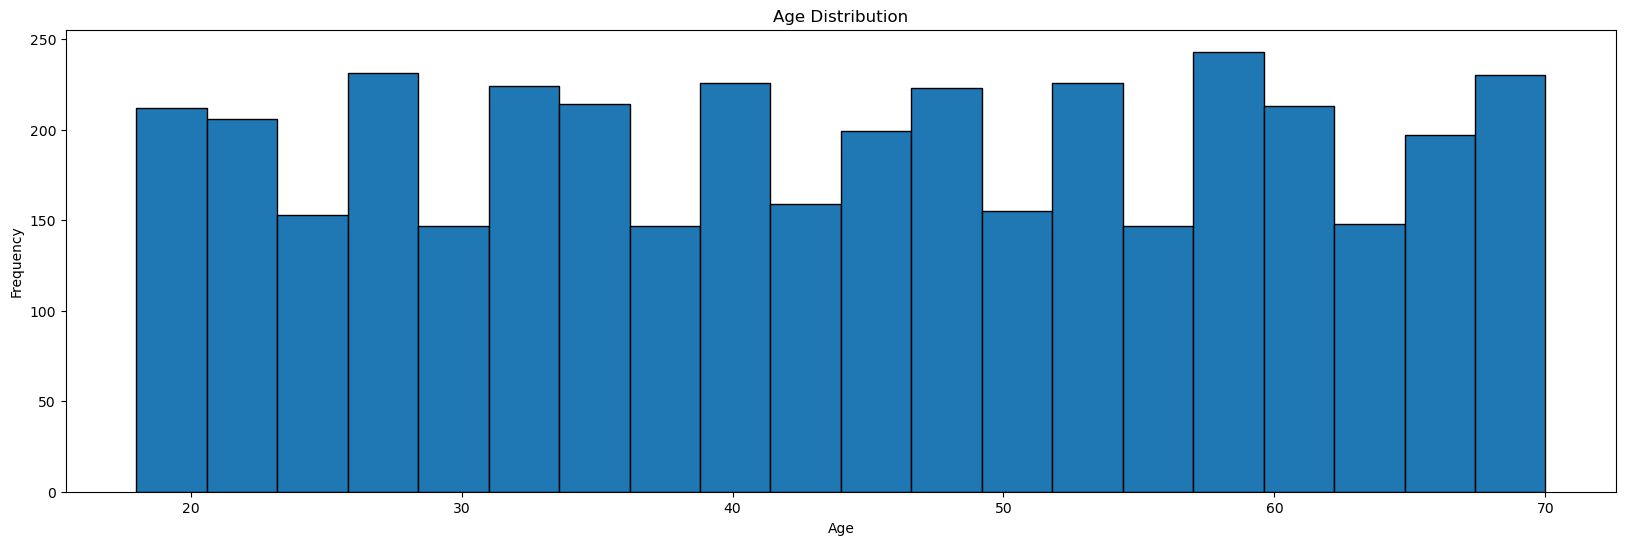

In [130]:
plt.figure(figsize = (20, 6))
plt.hist(df['Age'], bins = 20, edgecolor = 'k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

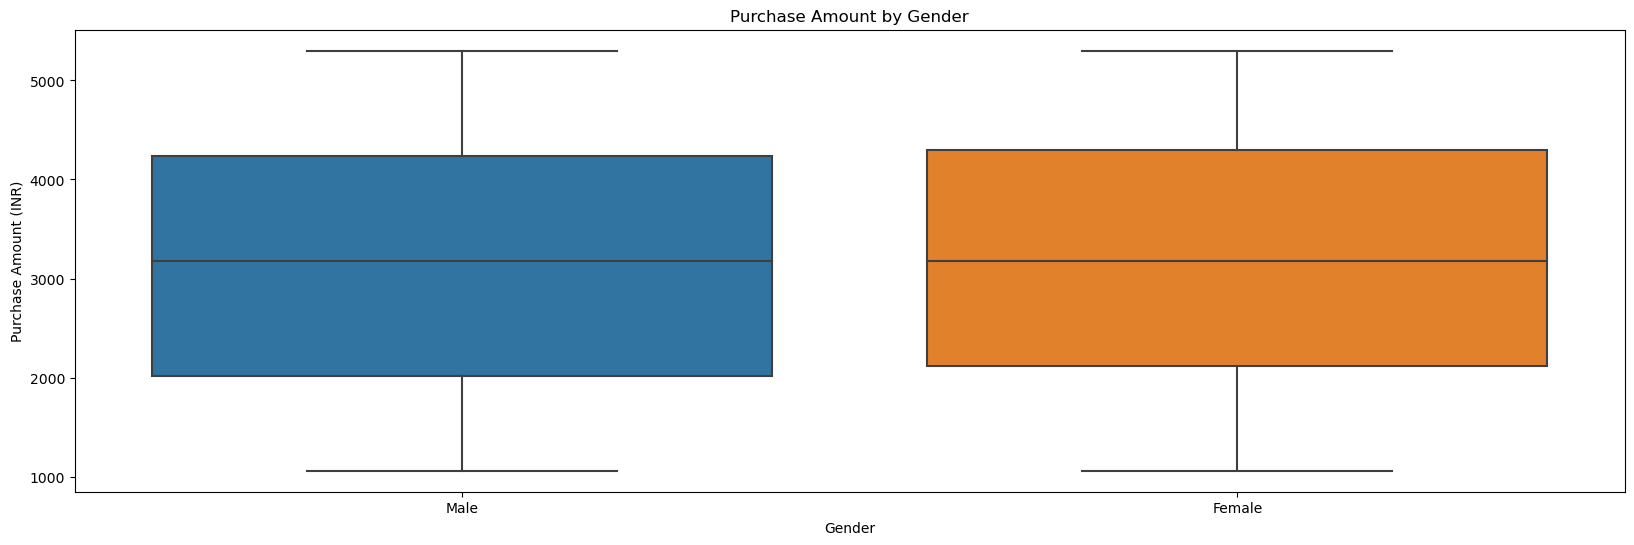

In [132]:
plt.figure(figsize = (20, 6))
sns.boxplot(x='Gender', y='Purchase Amount (INR)', data=df)
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (INR)')
plt.show()

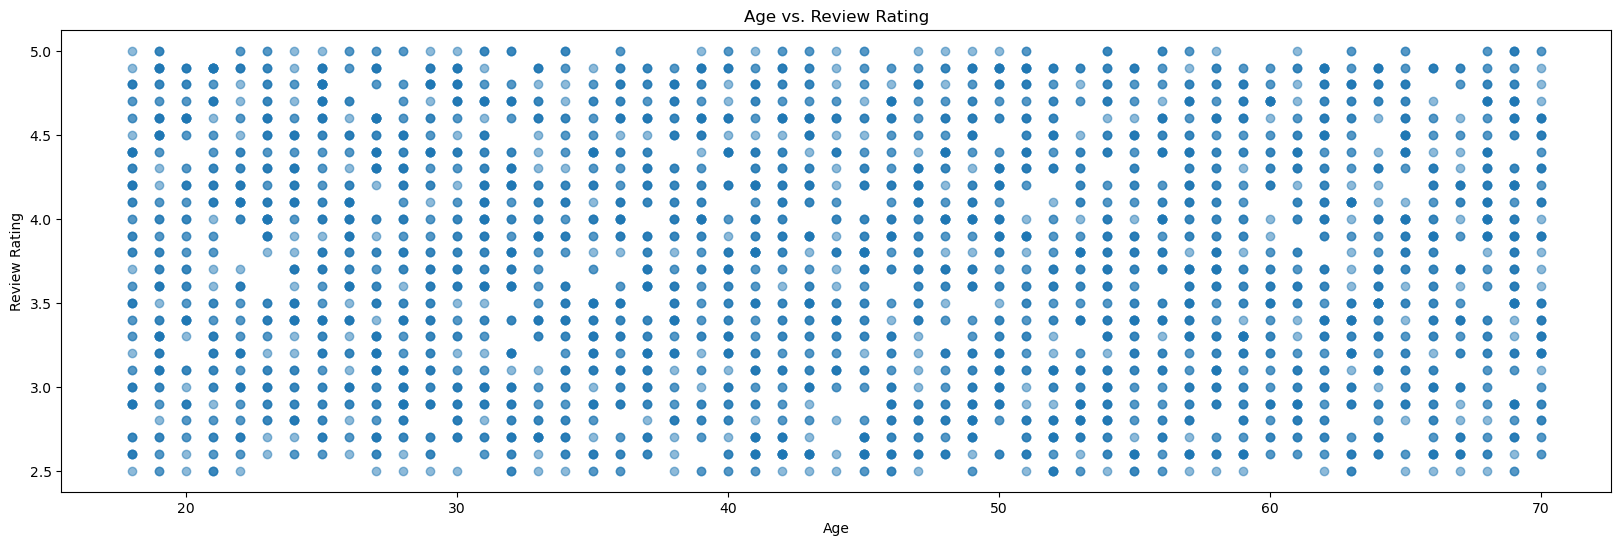

In [133]:
plt.figure(figsize = (20, 6))
plt.scatter(df['Age'], df['Review Rating'], alpha=0.5)
plt.title('Age vs. Review Rating')
plt.xlabel('Age')
plt.ylabel('Review Rating')
plt.show()

<Figure size 2000x600 with 0 Axes>

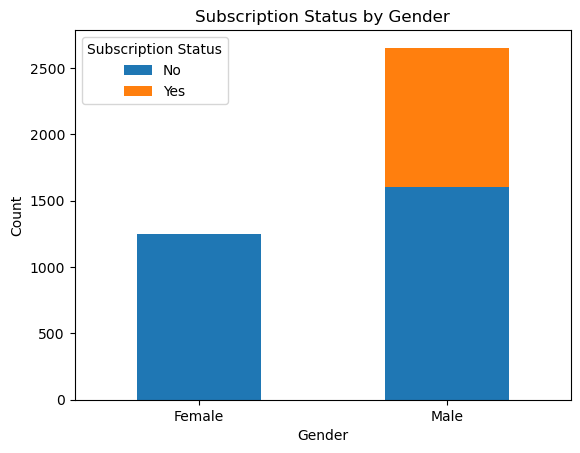

In [134]:
subscription_gender_counts = df.groupby(['Gender', 'Subscription Status']).size().unstack()
plt.figure(figsize = (20, 6))
subscription_gender_counts.plot(kind='bar', stacked=True, rot = 0);
plt.title('Subscription Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show();

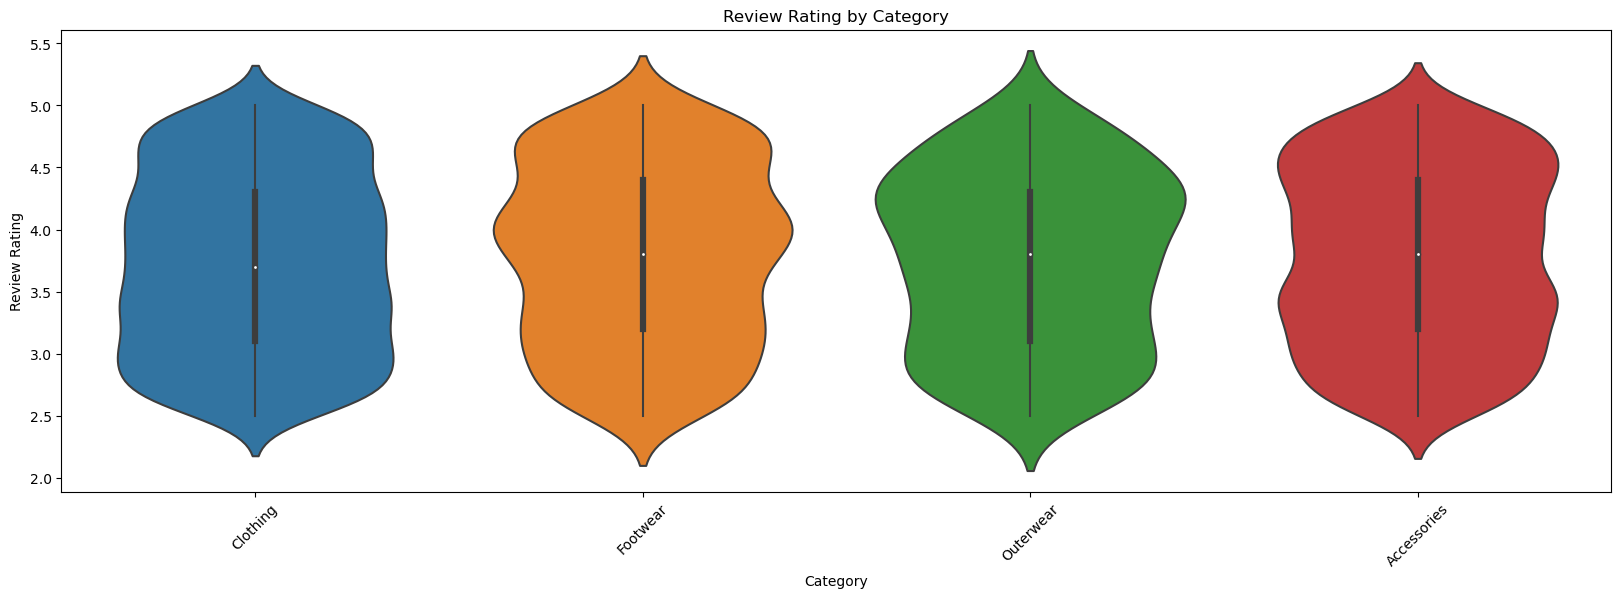

In [135]:
plt.figure(figsize=(20, 6))
sns.violinplot(x='Category', y='Review Rating', data=df)
plt.title('Review Rating by Category')
plt.xlabel('Category')
plt.ylabel('Review Rating')
plt.xticks(rotation=45)
plt.show()

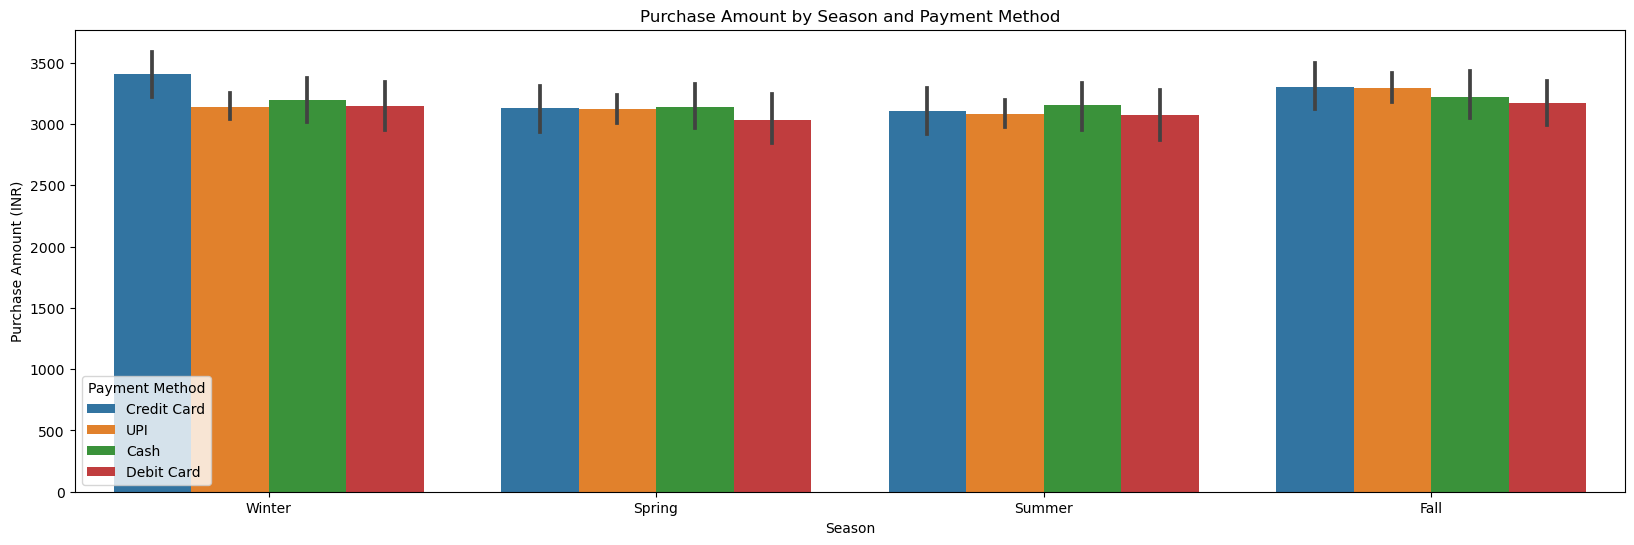

In [137]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Season', y='Purchase Amount (INR)', hue='Payment Method', data=df)
plt.title('Purchase Amount by Season and Payment Method')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (INR)')
plt.xticks(rotation = 0)
plt.show()

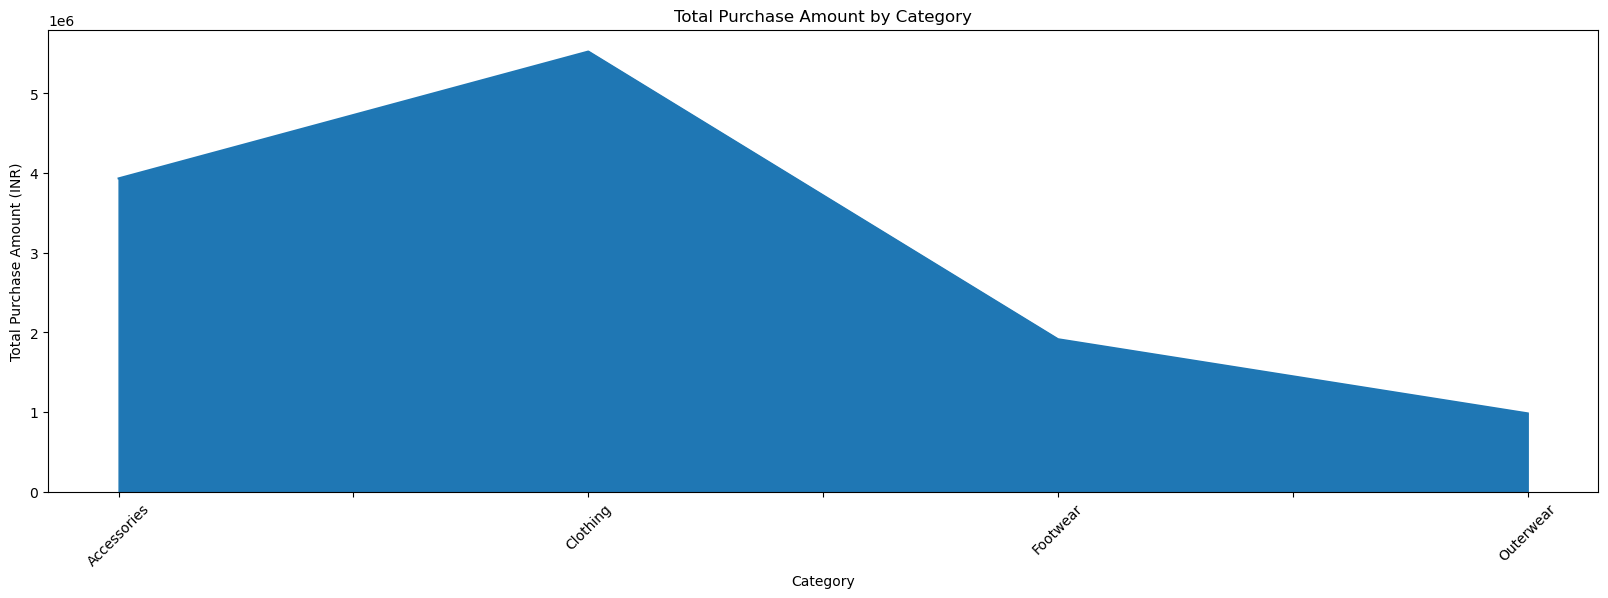

In [139]:
plt.figure(figsize=(20, 6))
category_purchase_total = df.groupby('Category')['Purchase Amount (INR)'].sum()

category_purchase_total.plot(kind='area')
plt.title('Total Purchase Amount by Category')
plt.xlabel('Category')
plt.ylabel('Total Purchase Amount (INR)')
plt.xticks(rotation=45)
plt.show()

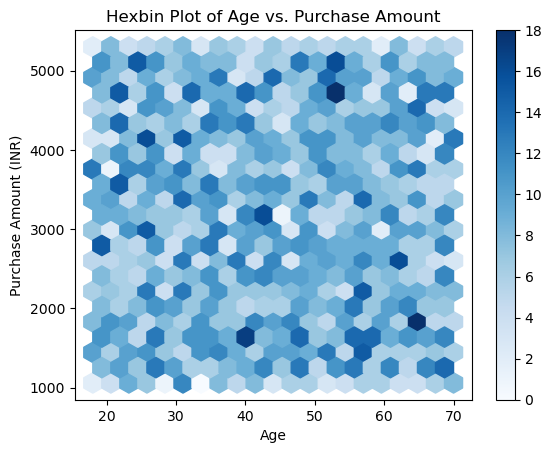

In [141]:
plt.hexbin(df['Age'], df['Purchase Amount (INR)'], gridsize=20, cmap='Blues')
plt.title('Hexbin Plot of Age vs. Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (INR)')
plt.colorbar()
plt.show()

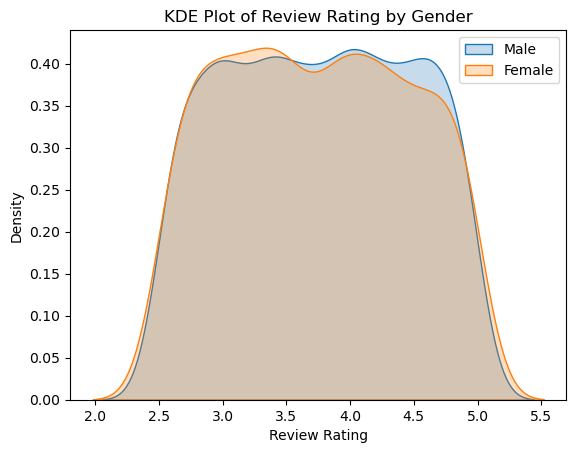

In [142]:
sns.kdeplot(df[df['Gender'] == 'Male']['Review Rating'], label='Male', shade=True)
sns.kdeplot(df[df['Gender'] == 'Female']['Review Rating'], label='Female', shade=True)
plt.title('KDE Plot of Review Rating by Gender')
plt.xlabel('Review Rating')
plt.ylabel('Density')
plt.legend()
plt.show()